In [2]:
!pip install google-colab
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
Mounted at /content/drive


/bin/bash: -c: line 1: syntax error near unexpected token `'/content/drive''
/bin/bash: -c: line 1: `drive.mount('/content/drive')'


In [2]:
import os
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/Customer_Queries/')
!ls


base_model_responses.json  customer_queries_with_subject.json  fine_tuned3ep_model_responses.json
customer_queries.json	   Customer-Queries.xlsx


In [ ]:
from huggingface_hub import notebook_login

# Login to Hugging Face
notebook_login()

In [ ]:
!pip install -U pip
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1
!pip install transformers==4.41.2  # Or the closest available version
!pip install datasets==2.20.0 accelerate==0.31.0 bitsandbytes==0.43.1
!pip install peft==0.11.1 trl==0.9.4 colored==2.2.4


from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
import json
import torch

  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_6

In [ ]:
# #This is the model trained on one epoch
# MODEL_NAME = "josedellasala/Llama-3-8B-Instruct-E7000-Final-RAG"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# # Load tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     quantization_config=quantization_config,
#     device_map="auto"
# )
# pipe = pipeline(
#     task="text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_new_tokens=125,
#     return_full_text=False,
# )
#This is the model trained on three epochs
MODEL_NAME_3EP = "josedellasala/Llama-3-8B-Instruct-E7000-Final-3Epochs-RAG"


# Load tokenizer and model
tokenizer_3ep = AutoTokenizer.from_pretrained(MODEL_NAME_3EP, use_fast=True)

model3ep = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME_3EP,
    quantization_config=quantization_config,
    device_map="auto"
)
pipe3ep = pipeline(
    task="text-generation",
    model=model3ep,
    tokenizer=tokenizer_3ep,
    max_new_tokens=125,
    return_full_text=False,
)


# Step 2: Define model details
BASE_MODEL_NAME = "meta-llama/Meta-Llama-3-8B-Instruct"

# Load tokenizer and model
base_tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_NAME, use_fast=True)

base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL_NAME,
    quantization_config=quantization_config,
    device_map="auto"
)
base_pipe = pipeline(
    task="text-generation",
    model=base_model,
    tokenizer=base_tokenizer,
    max_new_tokens=125,
    return_full_text=False,
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

In [3]:
import os
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/Customer_Queries/')
!ls

base_model_responses.json  customer_queries_with_subject.json  fine_tuned3ep_model_responses.json
customer_queries.json	   Customer-Queries.xlsx	       model_evaluation_results_gui.json


In [ ]:
import json
import random

# Load the questions dataset
with open("text_questions.json", "r") as file:
    questions = json.load(file)

def generate_prompt_and_answer(data_entry, pipeline):
    """
    Generates a prompt based on the question type and gets an answer
    from the LLM pipeline.
    """
    # Base prompt
    base_prompt = "Use your knowledge of Nyquist E7000 system to answer the following question briefly and with no explanation:\n\n"
    num_tokens = 5

    # Check the question type
    if data_entry["type"] == "multiple choice":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Options:\n" +
            "\n".join(data_entry["answer_options"]) +
            "\nAnswer (choose only one option):"
        )
    elif data_entry["type"] == "multiple choice (select one or more)":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Options:\n" +
            "\n".join(data_entry["answer_options"]) +
            "\nAnswer (choose more than one option, if applicable):"
        )
    elif data_entry["type"] == "completion":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Provide a concise answer:"
        )
        num_tokens = 15
    else:
        raise ValueError(
            f"Unknown question type '{data_entry['type']}'. Allowed types are: "
            "'multiple choice', 'multiple choice (select one or more)', 'completion'."
        )

    # Generate a concise answer
    generated_answer = pipeline(
        prompt,
        max_new_tokens=num_tokens,
        temperature=0.2,
        top_p=0.9,
        return_full_text=False
    )[0]["generated_text"]

    return {
        "question": data_entry["question"],
        "generated_answer": generated_answer.strip(),
        "expected_answer": data_entry["answer"]
    }

# Run experiments and save results
results = {}

for experiment_id in range(1, 6):  # Perform 5 experiments
    sampled_questions = random.sample(questions, 20)  # Randomly select 20 questions
    FTresults = []
    FT3epresults = []
    BASEresults = []

    for entry in sampled_questions:
        try:
            FTresults.append(generate_prompt_and_answer(entry, pipe))  # Replace `pipe` with your fine-tuned model pipeline
            FT3epresults.append(generate_prompt_and_answer(entry, pipe3ep))
            BASEresults.append(generate_prompt_and_answer(entry, base_pipe))  # Replace `base_pipe` with your base model pipeline
        except ValueError as e:
            print(f"Error processing question {entry.get('question_number', 'unknown')}: {str(e)}")

    # Save the results for this experiment
    results[f"Experiment_{experiment_id}"] = {
        "FTresults": FTresults,
        "FT3epresults": FT3epresults,
        "BASEresults": BASEresults
    }

# Save all experiments to a single JSON file
with open("experiments_results0.json", "w") as outfile:
    json.dump(results, outfile, indent=4)

print("All experiments completed and results saved.")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

All experiments completed and results saved.


In [ ]:
import json
from openai import OpenAI

# Load the experiments results JSON file
file_path = 'experiments_results1.json'  # Replace with the actual file path
with open(file_path, 'r') as file:
    experiments = json.load(file)

# Set your OpenAI API key
client = OpenAI(api_key="")

# Function to grade an answer using GPT-4
def chat_gpt(prompt):
    try:
        response = client.chat.completions.create(
            model="gpt-4",  # Update with the correct model name
            messages=[{"role": "user", "content": prompt}]
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error grading answer: {e}")
        return "0"

# Function to construct the prompt and grade the answer
def grade_answer(generated, expected):
    prompt = f"""
    Given the following:
    Generated Answer: {generated}
    Expected Answer: {expected}

    Grade the answer: Return only '1' if the generated answer matches the expected answer, otherwise return '0'.
    Instructions: if the generated answer contains the correct letter, count it as a good score.
    For example:

        "question": "What is the TFTP Server IP address in the Appliance Network Setup?",
        "generated_answer": "b. The IP address",
        "expected_answer": "b. The IP address of the Nyquist System Controller or Server"
        is Correct because both answers are b.
    """
    response = chat_gpt(prompt)
    # Clean and ensure the response is a valid integer
    response = response.replace("'", "").strip()  # Remove quotes if present
    try:
        return int(response)  # Convert the response to an integer
    except ValueError:
        print(f"Unexpected response from GPT: {response}")
        return 0  # Default to 0 for invalid responses

# Iterate through each experiment and grade answers for both LLMs
ft_total_score = 0
ft3ep_total_score = 0
base_total_score = 0
num_experiments = len(experiments)

for experiment_id, results in experiments.items():
    print(f"Processing {experiment_id}...")

    # Skip "Final_Averages" or any other non-experiment entry
    if experiment_id == "Final_Averages":
        continue

    # Initialize counters for this experiment
    ft_correct_answers = 0
    ft3ep_correct_answers = 0
    base_correct_answers = 0
    num_questions = len(results["FTresults"])

    # Grade Fine-Tuned model results
    for item in results["FTresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        ft_correct_answers += grade_answer(generated_answer, expected_answer)

    # Grade 3 Epoch Fine tuned model results
    for item in results["FT3epresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        ft3ep_correct_answers += grade_answer(generated_answer, expected_answer)

    # Grade Base model results
    for item in results["BASEresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        base_correct_answers += grade_answer(generated_answer, expected_answer)

    # Update total scores
    ft_total_score += ft_correct_answers / num_questions  # Average for this experiment
    ft3ep_total_score += ft3ep_correct_answers / num_questions  # Average for this experiment
    base_total_score += base_correct_answers / num_questions  # Average for this experiment

# Compute the final average scores across all experiments
ft_average_score = ft_total_score / num_experiments
ft3ep_average_score = ft3ep_total_score / num_experiments
base_average_score = base_total_score / num_experiments

# Add the final average grades to the dictionary
experiments["Final_Averages"] = {
    "Fine_Tuned_Model": ft_average_score,
    "Fine_Tuned_3Epochs_Model": ft3ep_average_score,
    "Base_Model": base_average_score
}

# Save the updated experiments back to the file
with open(file_path, "w") as outfile:
    json.dump(experiments, outfile, indent=4)

# Display results
print(f"Fine-Tuned Model Average Score: {ft_average_score:.2f}")
print(f"Fine-Tuned Model to 3 epochs Average Score: {ft3ep_average_score:.2f}")
print(f"Base Model Average Score: {base_average_score:.2f}")


Processing Experiment_1...
Processing Experiment_2...
Unexpected response from GPT: Generated Answer: ok
Grade the answer: 1
Processing Experiment_3...
Unexpected response from GPT: Given Answer: 0
Processing Experiment_4...
Processing Experiment_5...
Fine-Tuned Model Average Score: 0.56
Fine-Tuned Model to 3 epochs Average Score: 0.59
Base Model Average Score: 0.58


In [ ]:
import json
from transformers import pipeline

# Load customer queries (now including 'subject')
with open("customer_queries_with_subject.json", "r") as file:
    customer_queries = json.load(file)

# Prompt generators
def generate_troubleshooter_prompt(query):
    return (
        "You are a customer service representative expert in the Bogen E7000 system.\n"
        "Your task is to provide a possible explanation for the issue described below and suggest a possible fix.\n\n"
        f"Customer Query: {query}\n\n"
        "Explanation and Fix:"
    )

def generate_training_prompt(query):
    return (
        "You are a knowledgeable customer service representative specializing in the Bogen E7000 system. "
        "Your task is to provide clear, concise, and helpful answers to customer training queries, "
        "offering step-by-step instructions or guidance as needed.\n\n"
        f"Customer Query: {query}\n\n"
        "Response:\n"
        "- Provide a detailed explanation relevant to the query.\n"
        "- Include step-by-step instructions, if applicable.\n"
        "- Mention any key features or tips related to the query.\n"
        "- Avoid unnecessary information, and ensure clarity and precision.\n"
        "Answer:"
    )

def generate_prompt(query, query_type):
    if query_type == "SystemIssues":
        return generate_troubleshooter_prompt(query)
    elif query_type == "SystemQuestions":
        return generate_training_prompt(query)
    else:
        raise ValueError(f"Unknown query type: {query_type}")

# Generate answers
fine_tuned3ep_responses = []
base_model_responses = []

for query in customer_queries:
    prompt = generate_prompt(query["query"], query["type"])

    # Generate responses from both models
    fine_tuned3ep_answer = pipe3ep(prompt, max_new_tokens=125)[0]["generated_text"].strip()
    base_model_answer = base_pipe(prompt, max_new_tokens=125)[0]["generated_text"].strip()

    fine_tuned3ep_responses.append({
        "id": query["id"],
        "subject": query["subject"],
        "query": query["query"],
        "type": query["type"],
        "response": fine_tuned3ep_answer
    })

    base_model_responses.append({
        "id": query["id"],
        "subject": query["subject"],
        "query": query["query"],
        "type": query["type"],
        "response": base_model_answer
    })

# Save to JSON
with open("fine_tuned3ep_model_responses.json", "w") as fine_tuned3ep_file:
    json.dump(fine_tuned3ep_responses, fine_tuned3ep_file, indent=4)

with open("base_model_responses.json", "w") as base_model_file:
    json.dump(base_model_responses, base_model_file, indent=4)

print("✅ Responses saved.")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_to

✅ Responses saved.


In [7]:
import json
import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets

# Load responses
with open("fine_tuned3ep_model_responses.json", "r") as f:
    fine_tuned = json.load(f)

with open("base_model_responses.json", "r") as f:
    baseline = json.load(f)

fine_tuned_dict = {item['id']: item for item in fine_tuned}
baseline_dict = {item['id']: item for item in baseline}

# Sort and loop
ids = sorted(fine_tuned_dict.keys())
evaluations = []

# Use an iterator index
current_index = 0

def display_evaluation(index):
    ft = fine_tuned_dict[ids[index]]
    base = baseline_dict[ids[index]]

    # HTML layout with fixed pre box styling
    html = f"""
    <div style='font-family: Arial; max-width: 1000px;'>
        <h3>🔍 Query #{ft['id']}</h3>
        <p><strong><u>Subject:</u></strong> {ft.get('subject', '')}</p>
        <p><strong><u>Query:</u></strong> {ft['query']}</p>
        <hr>
        <h4>🧠 Fine-Tuned Model</h4>
        <pre style='
            background:#f4f4f4;
            padding:10px;
            border-radius:5px;
            white-space:pre-wrap;
            word-wrap:break-word;
            width:100%;
            overflow-x:auto;
        '>{ft['response']}</pre>

        <h4>⚙️ Baseline Model</h4>
        <pre style='
            background:#f4f4f4;
            padding:10px;
            border-radius:5px;
            white-space:pre-wrap;
            word-wrap:break-word;
            width:100%;
            overflow-x:auto;
        '>{base['response']}</pre>
    </div>
    """
    display(HTML(html))

    # Create widget fields
    ft_domain = widgets.BoundedIntText(value=1, min=1, max=3, description='FT Domain')
    ft_useful = widgets.BoundedIntText(value=1, min=1, max=3, description='FT Useful')
    base_domain = widgets.BoundedIntText(value=1, min=1, max=3, description='Base Domain')
    base_useful = widgets.BoundedIntText(value=1, min=1, max=3, description='Base Useful')
    button = widgets.Button(description='Submit Scores')

    def on_submit(b):
        # Record both scores
        evaluations.append({
            "id": ft['id'],
            "model": "fine_tuned",
            "subject": ft.get("subject", ""),
            "query": ft["query"],
            "response": ft["response"],
            "domain_knowledge": ft_domain.value,
            "usefulness": ft_useful.value,
            "total_score": ft_domain.value + ft_useful.value
        })
        evaluations.append({
            "id": base['id'],
            "model": "baseline",
            "subject": base.get("subject", ""),
            "query": base["query"],
            "response": base["response"],
            "domain_knowledge": base_domain.value,
            "usefulness": base_useful.value,
            "total_score": base_domain.value + base_useful.value
        })

        # Clear output and load next question
        from IPython.display import clear_output
        clear_output()
        global current_index
        current_index += 1
        if current_index < len(ids):
            display_evaluation(current_index)
        else:
            # Save once done
            with open("model_evaluation_results_gui.json", "w") as f:
                json.dump(evaluations, f, indent=4)
            print("✅ Evaluation complete and saved!")

    button.on_click(on_submit)
    display(widgets.VBox([ft_domain, ft_useful, base_domain, base_useful, button]))

# Start evaluation
display_evaluation(current_index)


✅ Evaluation complete and saved!


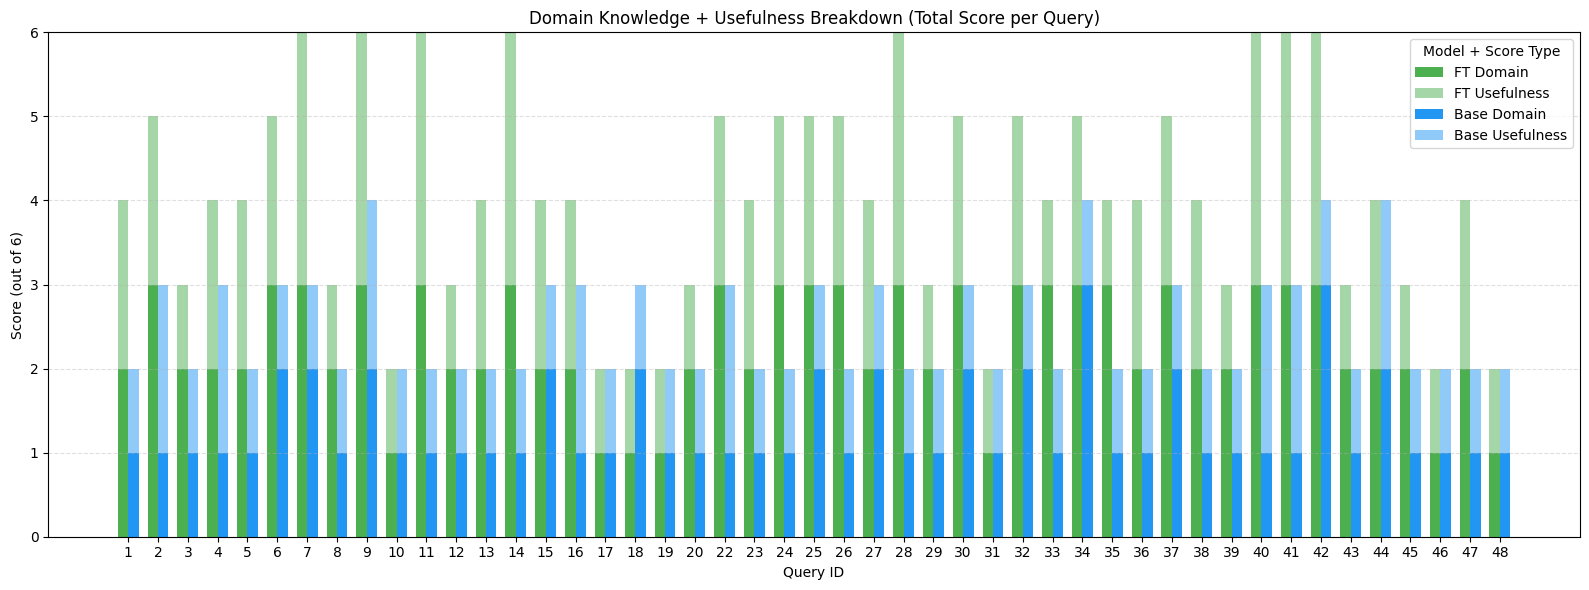

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load evaluation results
file_path = "model_evaluation_results_gui.json"
with open(file_path, "r") as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Pivot for side-by-side view
df_pivot = df.pivot(index="id", columns="model", values=["domain_knowledge", "usefulness"])
df_pivot = df_pivot.sort_index()

# Bar width settings
bar_width = 0.35
ids = df_pivot.index
x = range(len(ids))

# Plotting
plt.figure(figsize=(16, 6))

# Fine-Tuned Bars
plt.bar([i - bar_width/2 for i in x], df_pivot[("domain_knowledge", "fine_tuned")],
        width=bar_width, label="FT Domain", color="#4CAF50")
plt.bar([i - bar_width/2 for i in x], df_pivot[("usefulness", "fine_tuned")],
        width=bar_width, bottom=df_pivot[("domain_knowledge", "fine_tuned")],
        label="FT Usefulness", color="#A5D6A7")

# Baseline Bars
plt.bar([i + bar_width/2 for i in x], df_pivot[("domain_knowledge", "baseline")],
        width=bar_width, label="Base Domain", color="#2196F3")
plt.bar([i + bar_width/2 for i in x], df_pivot[("usefulness", "baseline")],
        width=bar_width, bottom=df_pivot[("domain_knowledge", "baseline")],
        label="Base Usefulness", color="#90CAF9")

# Labeling
plt.title("Domain Knowledge + Usefulness Breakdown (Total Score per Query)")
plt.xlabel("Query ID")
plt.ylabel("Score (out of 6)")
plt.xticks(ticks=x, labels=ids)
plt.ylim(0, 6)
plt.legend(title="Model + Score Type")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


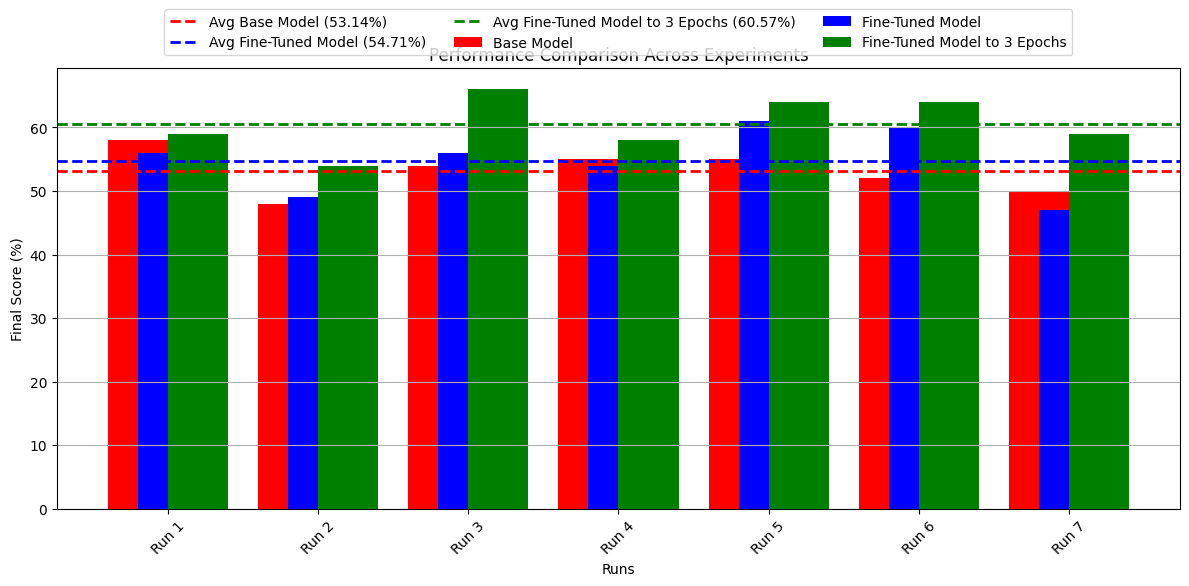

In [ ]:
import json
import matplotlib.pyplot as plt
import glob
import os

# Change directory to where experiment files are stored
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/runs/run2')

# Glob to find all files with the naming pattern
file_pattern = 'experiments_results*.json'
experiment_files = glob.glob(file_pattern)

# Check if files were found
if not experiment_files:
    raise FileNotFoundError(f"No files matching pattern '{file_pattern}' were found in the current directory.")

# Initialize lists to store final averages
ft_final_averages = []
ft3ep_final_averages = []
base_final_averages = []

# Process each file
for file_path in experiment_files:
    with open(file_path, 'r') as file:
        experiments = json.load(file)

    # Extract Final_Averages section
    if "Final_Averages" in experiments:
        ft_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_Model"] * 100)  # Convert to percentage
        ft3ep_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_3Epochs_Model"] * 100)  # Convert to percentage
        base_final_averages.append(experiments["Final_Averages"]["Base_Model"] * 100)  # Convert to percentage

# Ensure data exists
if not ft_final_averages or not base_final_averages:
    raise ValueError("No final averages were collected. Check the input files for valid data.")

# Calculate average performance for each model
avg_base = sum(base_final_averages) / len(base_final_averages)
avg_ft = sum(ft_final_averages) / len(ft_final_averages)
avg_ft3ep = sum(ft3ep_final_averages) / len(ft3ep_final_averages)

# Create a bar plot for Final Averages
plt.figure(figsize=(12, 6))
x = range(len(ft_final_averages))  # X positions for bars

# Bar Plot
plt.bar([i - 0.2 for i in x], base_final_averages, width=0.4, label="Base Model", color="red")  # Red for base
plt.bar([i for i in x], ft_final_averages, width=0.4, label="Fine-Tuned Model", color="blue")  # Blue for fine-tuned
plt.bar([i + 0.2 for i in x], ft3ep_final_averages, width=0.4, label="Fine-Tuned Model to 3 Epochs", color="green")  # Green for 3 epochs

# Add horizontal lines for average performances
plt.axhline(y=avg_base, color='red', linestyle='--', linewidth=2, label=f"Avg Base Model ({avg_base:.2f}%)")
plt.axhline(y=avg_ft, color='blue', linestyle='--', linewidth=2, label=f"Avg Fine-Tuned Model ({avg_ft:.2f}%)")
plt.axhline(y=avg_ft3ep, color='green', linestyle='--', linewidth=2, label=f"Avg Fine-Tuned Model to 3 Epochs ({avg_ft3ep:.2f}%)")

# Formatting
plt.xticks(x, [f"Run {i+1}" for i in x], rotation=45)
plt.title("Performance Comparison Across Experiments")
plt.xlabel("Runs")
plt.ylabel("Final Score (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Move legend to the top, outside the plot
plt.grid(axis="y")
plt.tight_layout()
plt.show()


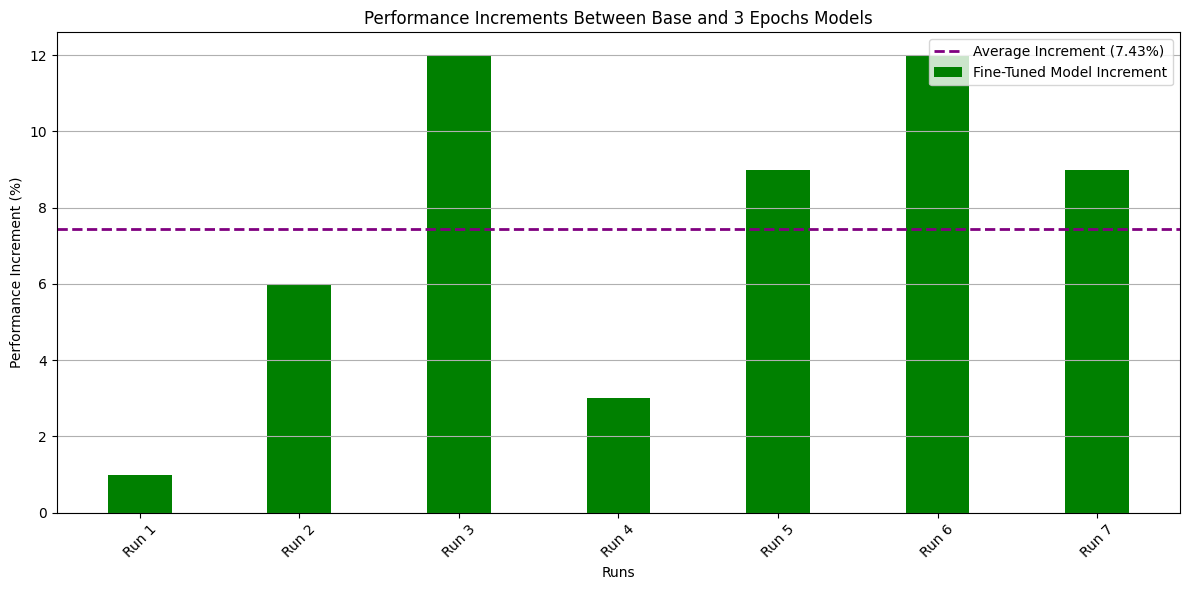

In [ ]:
import json
import matplotlib.pyplot as plt
import glob
import os

# Change directory to where experiment files are stored
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/runs/run2')

# Glob to find all files with the naming pattern
file_pattern = 'experiments_results*.json'
experiment_files = glob.glob(file_pattern)

# Check if files were found
if not experiment_files:
    raise FileNotFoundError(f"No files matching pattern '{file_pattern}' were found in the current directory.")

# Initialize lists to store final averages
ft_final_averages = []
ft3ep_final_averages = []
base_final_averages = []

# Process each file
for file_path in experiment_files:
    with open(file_path, 'r') as file:
        experiments = json.load(file)

    # Extract Final_Averages section
    if "Final_Averages" in experiments:
        ft_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_Model"] * 100)  # Convert to percentage
        ft3ep_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_3Epochs_Model"] * 100)  # Convert to percentage
        base_final_averages.append(experiments["Final_Averages"]["Base_Model"] * 100)  # Convert to percentage

# Ensure data exists
if not ft_final_averages or not base_final_averages:
    raise ValueError("No final averages were collected. Check the input files for valid data.")

# Calculate performance increments
ft_increment = [ft3ep - base for ft3ep, base in zip(ft3ep_final_averages, base_final_averages)]

# Calculate the average increment
average_increment = sum(ft_increment) / len(ft_increment)

# Plot increments
plt.figure(figsize=(12, 6))
x = range(len(ft_increment))  # X positions for bars

# Bar Plot for increments
plt.bar([i for i in x], ft_increment, width=0.4, label="Fine-Tuned Model Increment", color="green")

# Add a horizontal line for the average increment
plt.axhline(y=average_increment, color='purple', linestyle='--', linewidth=2, label=f"Average Increment ({average_increment:.2f}%)")

# Formatting
plt.xticks(x, [f"Run {i+1}" for i in x], rotation=45)
plt.title("Performance Increments Between Base and 3 Epochs Models")
plt.xlabel("Runs")
plt.ylabel("Performance Increment (%)")
plt.legend(loc='upper right')
plt.grid(axis="y")
plt.tight_layout()
plt.show()
